<a href="https://colab.research.google.com/github/thiagofuruchima/ds101/blob/main/inferential_statistics_traditional_x_bootstraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Inferential Statistics - Traditional x Bootstraping

I'm using this notebok to better understand inferential statistics, specially the differences between traditional and bootstraping approaches for confidence interval (CI) estimation and hypothesis testing.

A simple well-know dataset is used in this analysis. This dataset will be taken as our population, and a single Simple Random Sample (SRS) is going to be used.

## Data preparation

We're not going to do a full EDA, since our goal is just to get a better undertanding on inferential statistcs.

In [ ]:
# load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
from scipy import stats

In [ ]:
# load the titanic dataset
df = sns.load_dataset('titanic')

In [ ]:
# check the shape
df.shape

(891, 15)

In [ ]:
# check the datatypes
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [ ]:
# check for null values
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
# check the first 5 rows
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Take a SRS from the population
sample_size = 100
sample_df = df.sample(sample_size, replace=True)

## What is the 95% CI for the 'fare' price

In [ ]:
# Compute the mean, std for the 'fare' from our population
# This is NOT going to be used in inference, it is just for comparision
pop_mean, pop_std = df['fare'].mean(), df['fare'].std()
pop_mean, pop_std

(32.2042079685746, 49.693428597180905)

### Traditional Approach

In [ ]:
# calculate the sample_mean and sample_standard_deviation
sample_mean = sample_df['fare'].mean()
standard_error = sample_df['fare'].std()/np.sqrt(sample_size)

sample_mean, standard_error

(34.80195800000003, 6.34138786821607)

In [ ]:
# the critical value for 95% CI using the Z-Dist
stats.norm.ppf(0.025), stats.norm.ppf(.975)

(-1.9599639845400545, 1.959963984540054)

In [ ]:
# the critical value for 95% CI using the T-Dist
stats.t.ppf(0.025, df=sample_size-1), stats.t.ppf(.975, df=sample_size-1)

(-1.9842169515086832, 1.9842169515086827)

Since we're inferencing the population mean, and our sample size is 'small', we can't use the z-distribution, and have to use the t-distribution

In [ ]:
# Calculate the critical value for 95% CI (between 2.5% and 97.5%)
critical_value = stats.t.ppf(.975, df=sample_size-1)

critical_value

1.9842169515086827

In [ ]:
# Calculate the 95% CI
ci_lower = sample_mean-standard_error*critical_value
ci_upper = sample_mean+standard_error*critical_value

ci_lower, ci_lower

(22.21926869579419, 22.21926869579419)

In [ ]:
# Print the results
print("Statistic:", sample_mean)
print("Confidence Interval:", ci_lower, ci_upper)
print("Margin of Error: +-", critical_value*standard_error)

Statistic: 34.80195800000003
Confidence Interval: 22.21926869579419 47.38464730420586
Margin of Error: +- 12.582689304205834


In [ ]:
# 95% CI using the statsmodels
sms.DescrStatsW(sample_df['fare']).tconfint_mean(alpha=0.05)

(22.219268695794167, 47.38464730420583)

In [ ]:
# 95% CI using the scipy
stats.t.interval(0.95, df=sample_size-1 ,loc=sample_mean, scale=standard_error)

(22.21926869579419, 47.38464730420586)

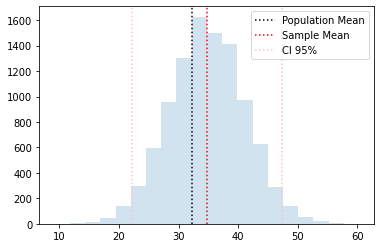

In [ ]:
# Plot the sample distribution 
plt.hist(np.random.normal(sample_mean, standard_error, 10000), bins=20, alpha=.2)
plt.axvline(x = pop_mean, color = "black", linestyle = "dotted", label='Population Mean')
plt.axvline(x = sample_mean, color = "red", linestyle = "dotted", label='Sample Mean')
plt.axvline(x = ci_lower, color = "pink", linestyle = "dotted", label='CI 95%')
plt.axvline(x = ci_upper, color = "pink", linestyle = "dotted")
plt.legend()
plt.show()

### Bootstraping Approach
1. Take the sample
2. Take n bootstrap samples from the sample
3. Compute the mean for each bootstrap sample
4. Compute the percentiles (.025 and .0975) of the bootstrap sample means

In [ ]:
# take n bootstrap samples from the sample
bootstrap_means_list = []
for _ in range(10000):
  # take one bootstrap sample
  bootstrap_sample = sample_df.sample(sample_size, replace=True)
  # compute the statistic for each sample
  bootstrap_mean = bootstrap_sample['fare'].mean()
  # add to the list
  bootstrap_means_list.append(bootstrap_mean)

# use the list to generate a DataFrame (for ease of use)
bootstrap_means_df = pd.DataFrame({"Bootstrap":bootstrap_means_list})

In [ ]:
# Calculate the sample distribution mean
bootstrap_mean = bootstrap_means_df['Bootstrap'].mean()
bootstrap_mean

34.788898187600104

In [ ]:
# Calculate the 95% CI using the percentiles from the bootstrap sample means
bootstrap_ci_lower = bootstrap_means_df['Bootstrap'].quantile(.025)
bootstrap_ci_upper = bootstrap_means_df['Bootstrap'].quantile(.975)
bootstrap_ci_lower, bootstrap_ci_upper

(24.057909450000004, 48.52363317500003)

In [ ]:
# Print the results
print("Statistic:", bootstrap_mean)
print("Confidence Interval:", bootstrap_ci_lower, bootstrap_ci_upper)
print("Margin of Error: TODO") # What is the right way to calculate the Margin of Error (since quantiles are not symetric)

Statistic: 34.788898187600104
Confidence Interval: 24.057909450000004 48.52363317500003
Margin of Error: TODO


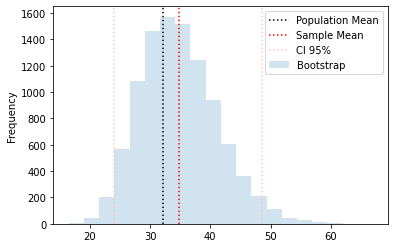

In [ ]:
# plot the distribution from the bootstrap means 
bootstrap_means_df.plot(kind='hist', bins=20, alpha=0.2)
plt.axvline(x = pop_mean, color = "black", linestyle = "dotted", label='Population Mean')
plt.axvline(x = bootstrap_mean, color = "red", linestyle = "dotted", label='Sample Mean')
plt.axvline(x = bootstrap_ci_lower, color = "pink", linestyle = "dotted", label='CI 95%')
plt.axvline(x = bootstrap_ci_upper, color = "pink", linestyle = "dotted")
plt.legend()
plt.show()

## Do men pay more for the ticket than women?

$$ 
H_0: \mu_{male} - \mu_{female} \le 0
$$

$$
H_1: \mu_{male} - \mu_{female} \gt 0 
$$

$$ 
H_0: \mu_{male} - \mu_{female} \le 0
$$

$$
H_1: \mu_{male} - \mu_{female} \gt 0 
$$

### Traditional Approach

The traditional approach to this type of hypothesis is to perform a t-test for the means of two independent samples, a.k.a. Two Sample T-Test.

In [ ]:
# define the significance level for our hypotesis tests
alpha = 0.05

In [ ]:
# separate the gender's fare's in two dataframes
male_fares_df = sample_df[sample_df['sex']=='male']['fare']
female_fares_df = sample_df[sample_df['sex']=='female']['fare']

In [ ]:
# Performe the levene test to check if the variances are statistically equal or not,
_, pvalue_levene = stats.levene(male_fares_df, female_fares_df)

# use levene's result to decide if the variances are equal or not 
equal_variances = pvalue_levene < alpha

equal_variances

False

In [ ]:
# Use scypy.stats.ttest_ind to perform the two sample t-test
_, pvalue_ttest = stats.ttest_ind(male_fares_df, female_fares_df, equal_var=equal_variances)

pvalue_ttest

0.20341420991061665

In [ ]:
# Use the t-test two sample result to evaluate H0
if (pvalue_ttest < alpha):
  print("We have evidence to reject the null hypothesis. Men pay more for tickets than women.")
else:
  print("We don't have evidence to reject the null hypothesis. Men don't pay more for tickets than women.")

We don't have evidence to reject the null hypothesis. Men don't pay more for tickets than women.


### Bootstrap Approach

1. Take the sample
2. Take n bootstrap samples from the sample
3. Compute the mean for each bootstrap sample
4. Simulate the distribution under H0
5. Compare the booststrap sample distribution and the H0 distribution  

In [ ]:
bootstrap_means_male, bootstrap_means_female = [], []

# take n bootstrap samples from the sample
for _ in range(10000):
  # take one bootstrap sample
  bootstrap_sample = sample_df.sample(sample_size, replace=True)
  # compute the statistic for each sample and add to the list
  bootstrap_means_male.append(bootstrap_sample[bootstrap_sample['sex']=='male']['fare'].mean())
  bootstrap_means_female.append(bootstrap_sample[bootstrap_sample['sex']=='female']['fare'].mean())

# use the lists to generate a DataFrame (for ease of use)
bootstrap_means_df = pd.DataFrame({'male':bootstrap_means_male, 'female':bootstrap_means_female})

# compute the mean diff between the two 'lists'
bootstrap_means_df['diff'] = bootstrap_means_df['male']-bootstrap_means_df['female']

In [ ]:
bootstrap_means_df.head()

,male,female,diff
0,23.503669,48.682000,-25.178331
1,37.584499,53.109113,-15.524614
2,21.638333,65.534660,-43.896327
3,37.074068,39.738367,-2.664298
4,20.510563,44.191231,-23.680668


In [ ]:
print(bootstrap_means_df['male'].mean())
print(bootstrap_means_df['female'].mean())

29.723206362535116
47.584623308316225


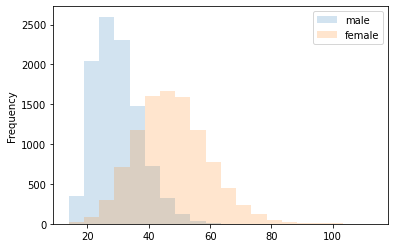

In [ ]:
# Plot both (male and female) bootstraps distributions of the means 
bootstrap_means_df[['male', 'female']].plot(kind='hist', bins=20, alpha=.2)

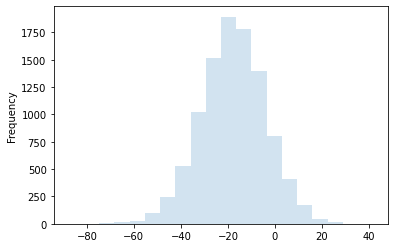

In [ ]:
# Plot the diff distribution 
bootstrap_means_df['diff'].plot(kind='hist', bins=20, alpha=.2)

In [ ]:
# Simulate the distribution under the null hypothesis
diff_means_h0 = []
for _ in range(10000):
  diff_means_h0.append(np.random.normal(0, bootstrap_means_df['diff'].std(), size=sample_size).mean())

bootstrap_means_df['diff_h0'] = diff_means_h0

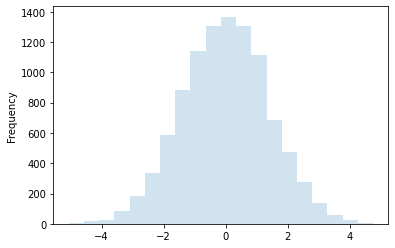

In [ ]:
# Plot the null distribution 
bootstrap_means_df['diff_h0'].plot(kind='hist', bins=20, alpha=.2)

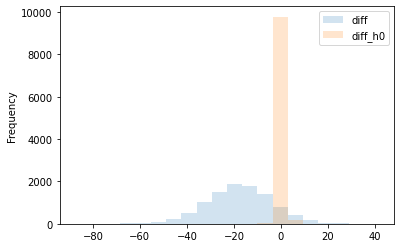

In [ ]:
# Plot both (diff and h0) bootstraps distributions of the means 
bootstrap_means_df[['diff', 'diff_h0']].plot(kind='hist', bins=20, alpha=.2)

In [ ]:
# Calculate p_value
pvalue_bootstrap = (bootstrap_means_df['diff'] > bootstrap_means_df['diff_h0']).mean()
pvalue_bootstrap

0.0945

In [ ]:
# H0 x H1 counts
(bootstrap_means_df['diff'] > bootstrap_means_df['diff_h0']).value_counts()

False    9055
True      945
dtype: int64

In [ ]:
# Use the pvalue to evaluate H0
if (pvalue_bootstrap < alpha):
  print("We have evidence to reject the null hypothesis. Men pay more for tickets than women.")
else:
  print("We don't have evidence to reject the null hypothesis. Men pay as much as women for tickets.")

We don't have evidence to reject the null hypothesis. Men pay as much as women for tickets.
